In [1]:
import numpy as np
import pandas as pd
import csv
import json
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
PATH_TO_USER_FILE = "yelp_academic_dataset_user.csv"
PATH_TO_REVIEW_FILE = "yelp_academic_dataset_review.csv"

In [3]:
user_df = pd.read_csv(PATH_TO_USER_FILE)

In [64]:
reviews_df = pd.read_csv(PATH_TO_REVIEW_FILE)

In [5]:
user_df.shape[0]

1518169

In [6]:
todays_date = datetime.now()

def convert_age(x):
    y = x.replace("b'", "")
    y = y[:-1]
    date = datetime.strptime(y, '%Y-%m-%d')
    return ((todays_date.year - date.year) * 12 + todays_date.month - date.month)/12.
    

user_df['age'] = user_df['yelping_since'].apply(lambda x: convert_age(x))

In [7]:
NumFriends = {}
NumFriendsTotal = {}
FriendList = {}

def num_friends(x):
    x = str(x)
    y = x.replace("b'", "")
    y = y[:-1]
    l = y.split(',')
    if l[0] == "None":
        return 0
    else:
        return len(l)
    

user_df['numfriends'] = user_df['friends'].apply(lambda x: num_friends(x))

In [8]:
def num_elite(x):
    x = str(x)
    y = x.replace("b'", "")
    y = y[:-1]
    l = y.split(',')
    if l[0] == "None":
        return 0
    else:
        return len(l)
    

user_df['numelite'] = user_df['elite'].apply(lambda x: num_elite(x))

In [91]:
elitedf = user_df[user_df['numelite'] > 0]
notelitedf = user_df[user_df['numelite'] == 0]
notelitedf.shape

(1451060, 26)

In [10]:
print("number of elite users:",elitedf.shape[0])
elitedf.max()

number of elite users: 67109


compliment_writer                                                 11715
review_count                                                      12723
yelping_since                                             b'2018-05-28'
fans                                                               8665
average_stars                                                         5
compliment_profile                                                 6347
name                                                            b'yoko'
funny                                                            242120
compliment_funny                                                  30699
useful                                                           258479
compliment_cute                                                    2805
elite                 b'2018, 2017, 2016, 2015, 2014, 2013, 2010, 20...
compliment_cool                                                   30699
compliment_plain                                                

In [11]:
user_df[user_df.numfriends>0]['review_count'].count()

879889

In [12]:
user_df.numfriends.max()

14995

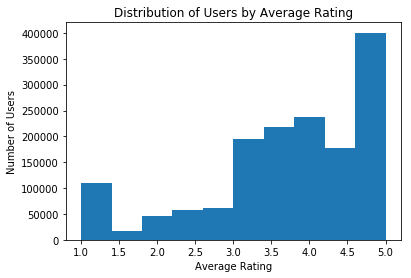

In [13]:
title = 'Distribution of Users by Average Rating'
plt.hist(user_df.average_stars, range=(1,5))
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.title(title)
plt.savefig(fname=title+'.png');

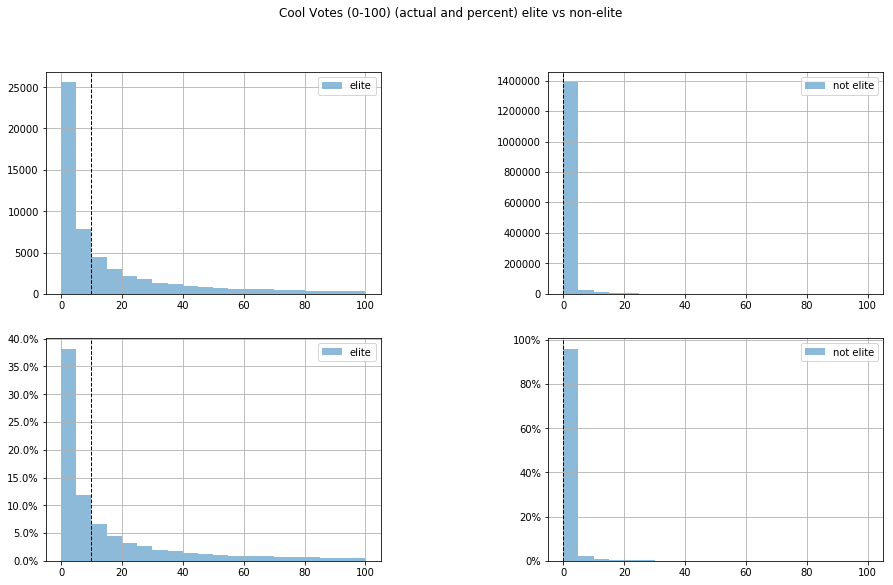

In [132]:
import random
from matplotlib.ticker import PercentFormatter

attr = "Cool Votes (0-100)"
elitex = elitedf.cool
notelitex = notelitedf.cool
elitebins = [x for x in range(0,105,5)]
notelitebins = [x for x in range(0,105,5)]

f, axes = plt.subplots(2, 2, figsize=(15, 9))

axes[0,0].hist(elitex, bins=elitebins, alpha= 0.5, label='elite')
axes[0,1].hist(notelitex, bins=notelitebins, alpha=0.5, label='not elite')
axes[0,0].axvline(elitex.median(), color='k', linestyle='dashed', linewidth=1)
axes[0,1].axvline(notelitex.median(), color='k', linestyle='dashed', linewidth=1)

axes[1,0].hist(elitex, weights=np.ones(elitedf.shape[0]) / elitedf.shape[0], bins=elitebins,alpha= 0.5, label='elite')
axes[1,1].hist(notelitex, weights=np.ones(notelitedf.shape[0]) / notelitedf.shape[0], bins=notelitebins,alpha=0.5, label='not elite')
axes[1,0].axvline(elitex.median(), color='k', linestyle='dashed', linewidth=1)
axes[1,1].axvline(notelitex.median(), color='k', linestyle='dashed', linewidth=1)

axes[0,0].legend(loc='upper right')
axes[0,1].legend(loc='best')
axes[1,0].legend(loc='upper right')
axes[1,1].legend(loc='best')

axes[0,0].grid()
axes[1,0].grid()
axes[0,1].grid()
axes[1,1].grid()

axes[1,0].yaxis.set_major_formatter(PercentFormatter(1))
axes[1,1].yaxis.set_major_formatter(PercentFormatter(1))

title = str(attr)+' (actual and percent) elite vs non-elite'
plt.suptitle(title)
plt.subplots_adjust(wspace=0.5)
plt.savefig(fname=title+'.png')

In [15]:
reviews_df.columns

Index(['useful', 'date', 'text', 'stars', 'review_id', 'user_id', 'funny',
       'business_id', 'cool'],
      dtype='object')

In [65]:
#reviews_df.user_id = reviews_df['user_id'].apply(lambda x: x.replace("b", "").replace('"', '').replace("'", ""))
num_reviews = dict(reviews_df['user_id'].value_counts())

In [66]:
user_df['num_reviews'] = user_df['user_id'].apply(lambda x: num_reviews[x] if x in num_reviews.keys() else 0)

In [224]:
user_df[['user_id','num_reviews', 'review_count', 'age','numfriends','numelite','useful','fans','average_stars']].sort_values('num_reviews', ascending=False).head(10)

,user_id,num_reviews,review_count,age,numfriends,numelite,useful,fans,average_stars
1399461,b'CxDOIDnH8gp9KXzpBHJYXw',3739,6082,9.000000,548,10,1381,684,3.31
526285,b'bLbSNkLggFnqwNNzzq-Ijw',2229,4187,7.416667,2859,7,13083,576,3.36
1095355,b'PKEzKWv_FktMm2mGPjwd0Q',1674,2353,9.916667,1202,9,1490,264,3.76
1215579,b'DK57YibC5ShBmqQl97CKog',1574,2206,12.833333,1099,6,15437,347,3.87
1089896,b'QJI9OSEn6ujRCtrX06vs1w',1324,1982,11.666667,5811,2,4829,284,3.61
1447345,b'd_TBs6J3twMy9GChqUEXkg',1245,1884,7.916667,424,7,26,86,3.58
1125436,b'hWDybu_KvYLSdEFzGrniTw',1220,9278,9.666667,1782,9,25881,479,3.60
576605,b'ELcQDlf69kb-ihJfxZyL0A',1204,1574,9.000000,263,0,975,60,3.12
717041,b'cMEtAiW60I5wE_vLfTxoJQ',1201,4124,9.500000,1073,9,45,173,4.04
1080413,b'YRcaNlwQ6XXPFDXWtuMGdA',1195,1871,9.416667,459,10,723,94,3.43


In [141]:
user_df[['user_id','num_reviews','age','numfriends','numelite','useful','fans','average_stars']].sort_values('fans', ascending=False).head(10)

,user_id,num_reviews,age,numfriends,numelite,useful,fans,average_stars
1115014,b'37cpUoM8hlkSQfReIEBd-Q',2,9.583333,5580,7,1606,8665,4.27
1426981,b'hizGc5W1tBHPghM5YKCAtg',21,9.500000,6842,10,13632,2785,4.19
677539,b'iLjMdZi0Tm7DQxX1C1_2dg',19,11.333333,12198,11,72305,2311,3.96
1097234,b'eKUGKQRE-Ywi5dY55_zChg',35,10.833333,5535,9,56903,2255,3.67
1117381,b'UsXqCXRZwSCSw0AT7y1uBg',48,10.833333,7334,10,30567,2028,3.95
1468551,b'ITa3vh5ERI90G_WP4SmGUQ',56,10.500000,5882,11,51048,1990,3.97
1323906,b'j14WgRoU_-2ZE1aw1dXrJg',15,9.833333,3266,10,1082,1978,3.70
863527,b'VHdY6oG2JPVNjihWhOooAQ',23,13.333333,6786,14,39120,1925,4.19
1113337,b'nkN_do3fJ9xekchVC-v68A',28,14.083333,6766,14,32256,1897,3.69
961744,b'peuxbSQwXed-81cSqL7Ykw',32,7.583333,6723,8,10778,1858,4.21


In [163]:
user_df[['user_id','num_reviews','review_count','age','numfriends','numelite','useful','fans','average_stars']].sort_values('numelite', ascending=False).head(12)

,user_id,num_reviews,review_count,age,numfriends,numelite,useful,fans,average_stars
863527,b'VHdY6oG2JPVNjihWhOooAQ',23,1878,13.333333,6786,14,39120,1925,4.19
733185,b'CNdJaOdUjLIceVxhWcMNRA',5,740,13.166667,775,14,2206,225,3.87
868623,b'5F_ASUSCHFf3YotkKioZ5w',69,1260,13.250000,518,14,6445,166,3.96
1113337,b'nkN_do3fJ9xekchVC-v68A',28,1342,14.083333,6766,14,32256,1897,3.69
1381790,b'23J4vG9_xxxdnmi8CBX7Ng',3,1668,14.083333,3830,14,50296,1300,4.36
828225,b'gjhzKWsqCIrpEd9pevbKZw',83,3141,13.166667,4284,14,22845,1141,3.83
925416,b'-eVlHbM2KRZQnBqfTXtDvw',4,681,13.166667,221,14,491,51,3.73
1467698,b'OnagJ2dnPjfRRT4a_CgKCw',11,1194,13.583333,556,14,282,131,4.12
1281146,b'nzsv-p1O8gCfP3XijfQrIw',138,4060,13.583333,1914,14,1599,697,3.45
1216914,b'9VJa4yxtnLct0pN_1RcD_w',2,2073,13.250000,1032,14,1327,285,3.73


In [164]:
user_df[['user_id','num_reviews','review_count','age','numfriends','numelite','useful','fans','average_stars']].sort_values('numfriends', ascending=False).head(12)

,user_id,num_reviews,review_count,age,numfriends,numelite,useful,fans,average_stars
1113738,b'qVc8ODYU5SZjKXVBgXdI7w',2,528,11.833333,14995,1,12342,256,3.90
677539,b'iLjMdZi0Tm7DQxX1C1_2dg',19,2349,11.333333,12198,11,72305,2311,3.96
1488432,b'ZIOCmdFaMIF56FR-nWr_2A',132,2490,7.833333,9213,7,2664,860,3.79
763169,b'mV4lknblF-zOKSF8nlGqDA',3,696,8.666667,8739,6,33449,174,3.82
828087,b'IU86PZPgTDCFwJEuAg2j7g',22,1917,9.833333,8568,10,3902,1115,4.08
1012957,b'F_5_UNX-wrAFCXuAkBZRDw',177,1227,10.000000,8480,10,20705,488,4.09
1316184,b'djxnI8Ux8ZYQJhiOQkrRhA',105,2095,10.500000,8227,10,18827,1360,4.12
966661,b'c-Dja5bexzEWBufNsHfRrQ',7,1338,9.500000,8153,10,13430,443,4.01
1122584,b'Oi1qbcz2m2SnwUeztGYcnQ',16,1207,8.666667,8035,9,6300,424,3.56
709682,b'fgwI3rYHOv1ipfVfCSx7pg',57,1634,9.166667,7894,10,54890,1593,4.29


In [144]:
user_df[['user_id','num_reviews','review_count','age','numfriends','numelite','useful','fans','average_stars']].sort_values('fans', ascending=False).head(10)

,user_id,num_reviews,review_count,age,numfriends,numelite,useful,fans,average_stars
1115014,b'37cpUoM8hlkSQfReIEBd-Q',2,1569,9.583333,5580,7,1606,8665,4.27
1426981,b'hizGc5W1tBHPghM5YKCAtg',21,1398,9.500000,6842,10,13632,2785,4.19
677539,b'iLjMdZi0Tm7DQxX1C1_2dg',19,2349,11.333333,12198,11,72305,2311,3.96
1097234,b'eKUGKQRE-Ywi5dY55_zChg',35,2100,10.833333,5535,9,56903,2255,3.67
1117381,b'UsXqCXRZwSCSw0AT7y1uBg',48,2762,10.833333,7334,10,30567,2028,3.95
1468551,b'ITa3vh5ERI90G_WP4SmGUQ',56,2846,10.500000,5882,11,51048,1990,3.97
1323906,b'j14WgRoU_-2ZE1aw1dXrJg',15,3045,9.833333,3266,10,1082,1978,3.70
863527,b'VHdY6oG2JPVNjihWhOooAQ',23,1878,13.333333,6786,14,39120,1925,4.19
1113337,b'nkN_do3fJ9xekchVC-v68A',28,1342,14.083333,6766,14,32256,1897,3.69
961744,b'peuxbSQwXed-81cSqL7Ykw',32,1586,7.583333,6723,8,10778,1858,4.21


In [145]:
user_df[['user_id','num_reviews','review_count','age','numfriends','numelite','useful','fans','average_stars']].sort_values('useful', ascending=False).head(10)

,user_id,num_reviews,review_count,age,numfriends,numelite,useful,fans,average_stars
1271206,b'JjXuiru1_ONzDkYVrHN0aw',4,1032,9.250000,4554,8,258479,1277,4.11
1094247,b'PhUqhfyk3jdaS0Xb619RJQ',68,92,4.583333,4606,4,201798,363,3.90
867821,b'6s-g2vFu12OemhiK3FJuOQ',89,2357,11.750000,4211,12,188759,968,3.78
816431,b'WR6033peFiviFPzAV0yhJg',6,735,10.916667,2556,7,173571,397,3.65
1478232,b'--2vR0DIsmQ6WfcSzKWigw',37,1294,6.000000,3558,6,167921,589,4.36
1265567,b'ax7SnXOTIpatbsmqHLqVow',7,841,8.833333,1555,7,149476,411,3.59
721384,b'PvSzDcag7vo1e5Zz7SkzMA',2,906,10.416667,1052,10,106840,258,3.90
962821,b'iH5YQPtx1qrNG4t2-DjI3Q',73,1251,9.333333,1447,9,105588,266,3.95
1014148,b'wTfb2nfzPIyFcYQArdPtuQ',151,276,8.333333,5302,0,102121,672,4.35
891453,b'AbMjnKOwg736fcIu8apuyQ',52,2450,8.500000,5459,9,100256,1037,3.58


In [169]:
user_df.columns

Index(['compliment_writer', 'review_count', 'yelping_since', 'fans',
       'average_stars', 'compliment_profile', 'name', 'funny',
       'compliment_funny', 'useful', 'compliment_cute', 'elite',
       'compliment_cool', 'compliment_plain', 'compliment_more', 'cool',
       'compliment_note', 'friends', 'user_id', 'compliment_list',
       'compliment_photos', 'compliment_hot', 'age', 'numfriends', 'numelite',
       'num_reviews'],
      dtype='object')

In [172]:
user_df[['review_count', 'fans',
       'average_stars', 'funny',
       'compliment_funny', 'useful', 'compliment_cute', 
       'compliment_cool', 'cool',
       'age', 'numfriends', 'numelite',
       'num_reviews']].corr()

,review_count,fans,average_stars,funny,compliment_funny,useful,compliment_cute,compliment_cool,cool,age,numfriends,numelite,num_reviews
review_count,1.000000,0.556532,0.013410,0.222932,0.330987,0.285425,0.142682,0.330987,0.250054,0.267275,0.440553,0.708737,0.364701
fans,0.556532,1.000000,0.010466,0.366707,0.531426,0.452877,0.243301,0.531426,0.421168,0.118003,0.563005,0.423559,0.193378
average_stars,0.013410,0.010466,1.000000,0.002568,0.004476,0.003396,0.001819,0.004476,0.003856,0.016086,0.046983,0.019395,0.006801
funny,0.222932,0.366707,0.002568,1.000000,0.681448,0.848618,0.306582,0.681448,0.856357,0.037165,0.249944,0.155274,0.083379
compliment_funny,0.330987,0.531426,0.004476,0.681448,1.000000,0.660193,0.608509,1.000000,0.671628,0.056386,0.348544,0.237776,0.107898
useful,0.285425,0.452877,0.003396,0.848618,0.660193,1.000000,0.297583,0.660193,0.928526,0.049169,0.314294,0.199522,0.106003
compliment_cute,0.142682,0.243301,0.001819,0.306582,0.608509,0.297583,1.000000,0.608509,0.295963,0.030147,0.138768,0.095407,0.030231
compliment_cool,0.330987,0.531426,0.004476,0.681448,1.000000,0.660193,0.608509,1.000000,0.671628,0.056386,0.348544,0.237776,0.107898
cool,0.250054,0.421168,0.003856,0.856357,0.671628,0.928526,0.295963,0.671628,1.000000,0.037437,0.290377,0.170835,0.093385
age,0.267275,0.118003,0.016086,0.037165,0.056386,0.049169,0.030147,0.056386,0.037437,1.000000,0.103118,0.209669,0.097633


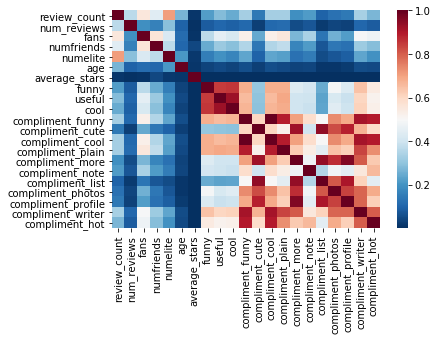

In [182]:
import seaborn as sns

corr = user_df[['review_count','num_reviews',  'fans', 'numfriends', 'numelite',  'age',
       'average_stars',  'funny', 'useful', 'cool', 
       'compliment_funny',  'compliment_cute', 
       'compliment_cool', 'compliment_plain', 'compliment_more', 
       'compliment_note',  'compliment_list',
       'compliment_photos', 'compliment_profile', 'compliment_writer',  'compliment_hot']].corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap="RdBu_r")

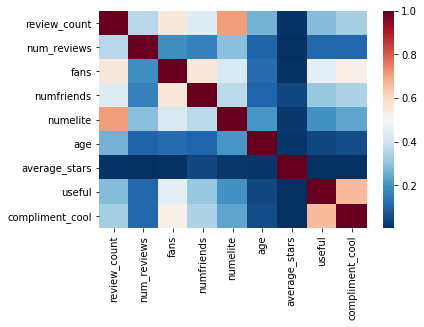

In [186]:
import seaborn as sns

corr = user_df[['review_count','num_reviews',  'fans', 'numfriends', 'numelite',  'age',
       'average_stars', 'useful', 
       'compliment_cool']].corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap="RdBu_r")

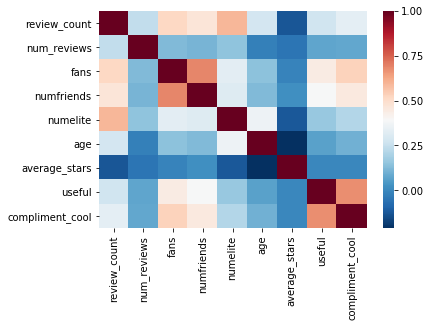

In [187]:
import seaborn as sns

corr = elitedf[['review_count','num_reviews',  'fans', 'numfriends', 'numelite',  'age',
       'average_stars', 'useful', 
       'compliment_cool']].corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap="RdBu_r")

# Bot Analysis

In [235]:
x = user_df[user_df['average_stars']==5.0].sort_values('num_reviews', ascending=False)
x = x[user_df['num_reviews']>2]
x[['user_id','num_reviews','review_count','age','numfriends','numelite','useful','fans','average_stars']]

/Users/bpadalkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,user_id,num_reviews,review_count,age,numfriends,numelite,useful,fans,average_stars
698288,b'M6ss5Ux8ZwZmwWQVsQTHkw',137,354,4.333333,0,0,0,0,5.0
1326400,b'2bC-dBYN48wrmN-j0Bv-Jw',55,139,11.166667,16,1,47,2,5.0
1384757,b'-sby2p3gq-Ou0kBv6FsoXA',42,56,6.750000,4,0,12,1,5.0
1291515,b'2-PD6df20ge-k9SPHmcxiw',42,44,8.500000,69,0,30,4,5.0
422532,b'QWBHzIoIFvab0g8QR3V4Ng',41,59,6.333333,0,0,37,0,5.0
938907,b'0pnITZyMrKR80ZjNjYzl3A',35,42,7.000000,3,0,0,2,5.0
1341379,b'HmMedCwbr0j-Mle67x7aoA',35,48,6.583333,37,0,6,0,5.0
1425559,b'Wh8hYReCfAJQVwZy66K9ww',35,35,2.750000,28,0,3,1,5.0
423726,b'MTl8QNjnenumWaORnXhing',35,42,6.416667,13,0,6,0,5.0
261530,b'1fdBpMGBdCjjXRt0-EEGOg',35,39,7.666667,39,0,11,1,5.0


In [234]:
x = reviews_df[reviews_df['user_id']== "b'2bC-dBYN48wrmN-j0Bv-Jw'"]
#pd.set_option('display.max_colwidth', -1)
x[['date', 'text', 'business_id']]
#x[['useful', 'date', 'text', 'stars', 'review_id', 'user_id', 'funny','business_id', 'cool']]

,date,text,business_id
5025865,b'2016-02-07',"b'This Goodwill is outstanding. Very helpful staff, clean and with excellent finds in all departments. I have had some amazing luck there.'",b'gUl8wa-czuoDWFxAA5KLog'
5025866,b'2016-02-01',"b""I just came back from Linder Dermatology and I am so very impressed. I got in immediately with no wait time. Every single one of the staff were so nice from the front desk girl (who just moved here from Virginia Beach), to Sheila the doctor's assistant to the doctor-Dr. Price herself. They efficiently addressed my needs and were very helpful in answering my many questions. They didn't try to upsell me but provided the information I needed so I could discern the products I needed. I felt very welcomed in this warm and friendly atmosphere! Probably the most wonderful group of people in one place in any medical establishment I have ever been to.That's saying something!!!""",b'EmeHVWMeY7N0TwAFmezHnA'
5025867,b'2017-10-04',b'I love Menchies and from this point forward I only want to have a frozen yogurt cake! It was truly delicious and good value for my dessert.',b'1EdQcTrx-wUfPAp03g35oA'
5025868,b'2016-02-27',"b""I just had a ton of Hummus Xpress food at the Vegan Festival in Phoenix. The food was amazing! Truly! The guys preparing the food were so great. Don't miss out!""",b'Jzth-y32SyvOhJNgbIPTqQ'
5025869,b'2017-02-11',"b""Beautiful place! You can come and hang out on the grass or a bench and just enjoy the comforts of a cool and fun place. Lots of great foo dads to buy. There was no problem parking. The servers are so sweet! I'm gonna go back in and get some gifts when I am done with my salad!""",b'0CElIQnJdQYF2bmsAiWczg'
5025870,b'2015-02-14',"b'This place makes me HAPPY! The food is amazing, the staff are wonderful-especially the owner and the atmosphere is great! I recently bought a photograph that was displayed! One stop!! :)'",b'ROMFVEFKEYi7qhyITX6jfA'
5025871,b'2015-11-01',b'What a sweet and beautiful oasis in the middle of the city. There were so many varieties of roses. Perfect for a picnic or a place to take photographs. I plan to look into volunteering as I understand they need dead headers to care for the roses.',b'1HejAI1OQDkw69qu7PcKfw'
5025872,b'2017-01-21',b'Lance was very professional and was incredibly detailed oriented in terms of cleaning all the vents and the air conditioner. Lance called before he arrived and was very thorough in explaining what he was doing and how the process worked. I just moved into my place and the vents certainly had never been cleaned.',b'HJxEEWc0HU5a9OwmpClj8w'
5025873,b'2016-01-05',"b'I think I have found my yoga home! The initial class is free so I took a lovely candlelight yoga class with Dusty Snow. What truly beautiful energy she has. Also the peaceful and soothing ambiance of the studio was captivating. I was actually exhausted after a long day at work when I went, however, when I emerged from the class I was energized and gratified. As a long term devotee of Zumba and Pilates Plus, I have yearned to begin a yoga practice. I have taken some class with the amazing Samantha Judkins, but alas she moved to Los Angeles. I have been utilizing videos for some yoga practice-but there is just nothing like ""in person"" yoga. I know this is going to continue to be a great experience for me. And right next to The Shrine of Holy Wisdom-a bonus!! I am so grateful to have found this treasure in Tempe!'",b'_AccMP-nMlmM6YTs1OF7Gw'
5025874,b'2013-06-01',b'Steleta has been cutting (and dying if you must know) my hair for years and at a great price. She really knows how to do hair. She was trained in upscale New York salons. I would not go anywhere else. People stop me all the time to ask me where I get my hair done. She also cuts both of my pre-teen and teen boys hair and she does an amazing job.',b'gOe77-SifZ1qEA0s8L9EYw'


In [241]:
x = user_df[user_df['average_stars']==1].sort_values('num_reviews', ascending=False)
x = x[user_df['num_reviews']>3]
x[['user_id','num_reviews','review_count','age','numfriends','numelite','useful','fans','average_stars']]

/Users/bpadalkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,user_id,num_reviews,review_count,age,numfriends,numelite,useful,fans,average_stars
1260608,b'boVYlNwPXT7xTGCotNtUjw',33,48,5.416667,0,0,192,0,1.0
1499848,b'X7dzSxWdHcJbvCJBHmnDpA',18,18,5.750000,1,0,0,0,1.0
1223362,b'CpJ79GKbaOypscokjS8sgQ',16,22,5.000000,5,0,80,0,1.0
1130537,b'6xm-AIdpvzSd-bmFEJF5RQ',16,16,2.916667,28,0,15,0,1.0
848295,b'XEusWHEdFQUo_DLB_h7wDw',14,21,1.000000,0,0,16,3,1.0
958277,b'tCPo_mI4lpV6r3d0FOMs6w',13,14,4.416667,0,0,0,1,1.0
1348336,b'iZRHlgciXSkbb3GZAwfQYQ',13,13,3.083333,6,0,4,0,1.0
1075758,b'jSp8rG4Tv0wnDFqa9v4J6g',12,18,3.166667,18,0,0,0,1.0
960962,b'p0H4VUlKhq_D8bwllGi2HQ',12,12,3.166667,0,0,3,2,1.0
425347,b'UIlFmRAJ2D2iag3y2uNFZg',12,12,6.666667,0,0,4,0,1.0


In [217]:
x = reviews_df[reviews_df['user_id']== "b'vxCXuHtY4hYnjtvL1h3s_A'"]
pd.set_option('display.max_colwidth', -1)
x[['text', 'date', 'business_id']]
#x[['useful', 'date', 'text', 'stars', 'review_id', 'user_id', 'funny',
#       'business_id', 'cool']]

,text,date,business_id
606385,"b""HORRIBLE CUSTOMER SERVICE. I'd give 0 stars if that was an option. Much like another reviewer, the installers did a poor job and left gaping spaces between the floor and baseboards. When I raised this at the time of installation, they brushed my concern aside and said that's what I get for replacing carpet with wood floors. I wasn't comfortable at the time but I didn't question it since I'm not a flooring expert, but now, a few years and hundreds of dollars of insect treatment later, I have a massive insect problem because of these spaces. I've called and emailed this business 6x in the last few weeks with the promise Scott would get back to me. I happened to have caught him once on the phone, kindly explained my problem, and he said he'd come take a look. Since then, all my attempts to schedule a meeting with him have gone ignored. They were lightning quick to accept our money and completely absent for rectifying the problems they've caused, so as a result, we've had to hire another company (who confirmed the installation was done poorly and had it been done properly, we wouldn't have ants and bugs crawling all over our home and even our beds).""",b'2016-10-19',b'TLl79KIrEhjDr6u6rsoLhQ'
606386,"b""TERRIBLE SERVICE. To be fair, the food here is delicious and my husband and I used to go all the time. Service is generally quite slow, but we could make an exception because the food was so good. But the last 6/6 times we've been, food items we ordered never came out even though we were charged for it; they brought out food we never ordered and charged us for it; or, the food arrives 45 minutes after you've ordered it (and trust me, your server will not care of bother to check on the status of your food). I have other friends who have complained about Yasu's questionable billing practices and terrible, slow service (the wait staff is never in a rush to check on you, refill drinks, or keep track of your food), so as much as I love the food, I won't be returning unless service improves significantly.""",b'2016-10-05',b'oZcbn7ENit23xbCsyu9xbA'
606387,"b""While Dr. Curley is nice, the service and staff at Phoenix Pediatrics is the WORST I have come across in years, and I will never send my kids here again. This office has lost one consent form after another, and the office manager, Julene, was the worst of everyone when I brought this to her attention. How does a pediatrician's office lose a parental consent form that has been provided 3-4x in the past? I wish I could have given 0 stars.""",b'2017-11-30',b'xKKCPtcEEn8LK5j0WXLyyg'
606388,"b'Service and food were SO AWFUL! In its defense, the restaurant was super packed at lunch because of a convention in town. But that being said, it does not excuse the terrible service and lack of organization. It was just me and a friend there for lunch, and a party of 6 that arrive after us ended up getting their food before us. A party of 2 that arrived after us got drinks, ate their entire lunch, paid the bill and left LONG before we even got our food. A simple ""sorry for the wait"" would have been nice, but there were no apologies. And finally, the straw that broke the camel\'s back for me is that when I got my less-than-mediocre pad thai, there was a partially melted metal button embedded in the noodles. Again, no apologies, they just grudgingly removed the charges for my meal from the bill. I work downtown and used to eat here fairly regularly but it will take a catastrophic event to force me to return here.'",b'2014-05-14',b'u4ihxqmtr1X230QA9ElJgg'
606389,"b'I would give 0 stars to this business if it were possible. The doctor never knows why my kids and I are there to see him and clearly doesn\'t read the charts before meeting with us, but that seems to be par for the course for this office that is both disorganized and incompetent. They claimed my son needed blood work done, failed to send in the order to the lab, so when we arrived, the lab had no idea what

In [223]:
elitedf[elitedf['review_count']==1]

compliment_writer  review_count  yelping_since  fans  average_stars  \
111435   8                  1             b'2008-08-17'  16    3.20            
694122   4                  1             b'2009-03-25'  9     3.47            
867469   19                 1             b'2012-03-22'  18    3.20            
884153   14                 1             b'2005-06-15'  26    3.59            
1014024  9                  1             b'2012-06-26'  12    3.93            
1187913  147                1             b'2008-09-02'  128   3.56            

         compliment_profile        name  funny  compliment_funny  useful  \
111435   0                   b'Mike'     0      13                0        
694122   0                   b'Lo'       141    12                129      
867469   0                   b'ByeYelp'  29     59                89       
884153   1                   b'Leila'    89     37                66       
1014024  2                   b'Angela'   25     42                63       
1187913  5                   b'Joel'     299    379               314      

            ...       compliment_note  \
111435      ...       16                
694122      ...       11                
867469      ...       41                
884153      ...       16                
1014024     ...       14                
1187913     ...       222               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [239]:
x = user_df.sort_values('num_reviews', ascending=False)
x = x[user_df['num_reviews']>5]
x[['user_id','num_reviews','review_count','age','numfriends','numelite','useful','fans','average_stars']]

/Users/bpadalkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,user_id,num_reviews,review_count,age,numfriends,numelite,useful,fans,average_stars
1399461,b'CxDOIDnH8gp9KXzpBHJYXw',3739,6082,9.000000,548,10,1381,684,3.31
526285,b'bLbSNkLggFnqwNNzzq-Ijw',2229,4187,7.416667,2859,7,13083,576,3.36
1095355,b'PKEzKWv_FktMm2mGPjwd0Q',1674,2353,9.916667,1202,9,1490,264,3.76
1215579,b'DK57YibC5ShBmqQl97CKog',1574,2206,12.833333,1099,6,15437,347,3.87
1089896,b'QJI9OSEn6ujRCtrX06vs1w',1324,1982,11.666667,5811,2,4829,284,3.61
1447345,b'd_TBs6J3twMy9GChqUEXkg',1245,1884,7.916667,424,7,26,86,3.58
1125436,b'hWDybu_KvYLSdEFzGrniTw',1220,9278,9.666667,1782,9,25881,479,3.60
576605,b'ELcQDlf69kb-ihJfxZyL0A',1204,1574,9.000000,263,0,975,60,3.12
717041,b'cMEtAiW60I5wE_vLfTxoJQ',1201,4124,9.500000,1073,9,45,173,4.04
1080413,b'YRcaNlwQ6XXPFDXWtuMGdA',1195,1871,9.416667,459,10,723,94,3.43


In [229]:
x = reviews_df[reviews_df['user_id']== "b'M6ss5Ux8ZwZmwWQVsQTHkw'"]
#pd.set_option('display.max_colwidth', -1)
x[['text', 'date', 'business_id']]
#x[['useful', 'date', 'text', 'stars', 'review_id', 'user_id', 'funny',
#       'business_id', 'cool']]

,text,date,business_id
2165556,"b'Sale Reviews Yelp googl facebook\nWe write reviews, promote your companies\nWe will also help get rid of competitors\nReplace reviews in the event that more than 30% of the order is filtered within 30 days\nFirst review for free\nContact us 860smirnov860@gmail.com\nThe services Yelp\n1 Reviews Yelp= 30$\n100 real people accounts Yelp, accounts from 2008 to 2016 reviews friends =500$\n-------------------------------------------------------------------------------------------\n1 Reviews googl =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$\n--------------------------------------------------------------------------------------------\n1 Reviews facebook =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$'",b'2018-07-02',b'eRuZ84vFU46Y2h7WuqmirQ'
2165557,"b'Sale Reviews Yelp googl facebook\nWe write reviews, promote your companies\nWe will also help get rid of competitors\nReplace reviews in the event that more than 30% of the order is filtered within 30 days\nFirst review for free\nContact us 860smirnov860@gmail.com\nThe services Yelp\n1 Reviews Yelp= 30$\n100 real people accounts Yelp, accounts from 2008 to 2016 reviews friends =500$\n-------------------------------------------------------------------------------------------\n1 Reviews googl =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$\n--------------------------------------------------------------------------------------------\n1 Reviews facebook =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$'",b'2018-07-02',b'RK_Wi5Y8KSbLYsjgGdPvfg'
2165558,"b'Sale Reviews Yelp googl facebook\nWe write reviews, promote your companies\nWe will also help get rid of competitors\nReplace reviews in the event that more than 30% of the order is filtered within 30 days\nFirst review for free\nContact us 860smirnov860@gmail.com\nThe services Yelp\n1 Reviews Yelp= 30$\n100 real people accounts Yelp, accounts from 2008 to 2016 reviews friends =500$\n-------------------------------------------------------------------------------------------\n1 Reviews googl =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$\n--------------------------------------------------------------------------------------------\n1 Reviews facebook =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$'",b'2018-07-01',b'UuCK4wM7Xu7fNkEkk4zbMQ'
2165559,"b'Sale Reviews Yelp googl facebook\nWe write reviews, promote your companies\nWe will also help get rid of competitors\nReplace reviews in the event that more than 30% of the order is filtered within 30 days\nFirst review for free\nContact us 860smirnov860@gmail.com\nThe services Yelp\n1 Reviews Yelp= 30$\n100 real people accounts Yelp, accounts from 2008 to 2016 reviews friends =500$\n-------------------------------------------------------------------------------------------\n1 Reviews googl =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$\n--------------------------------------------------------------------------------------------\n1 Reviews facebook =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$'",b'2018-07-01',b'jbD1wUBzsd4554XLLsLWjA'
2165560,"b'Sale Reviews Yelp googl facebook\nWe write reviews, promote your companies\nWe will also help get rid of competitors\nReplace reviews in the event that more than 30% of the order is filtered within 30 days\nFirst review for free\nContact us 860smirnov860@gmail.com\nThe services Yelp\n1 Reviews Yelp= 30$\n100 real people accounts Yelp, accounts from 2008 to 2016 reviews friends =500$\n-------------------------------------------------------------------------------------------\n1 Reviews googl =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$\n----------------------------------

In [232]:
x = reviews_df[reviews_df['user_id']== "b'M6ss5Ux8ZwZmwWQVsQTHkw'"]
#pd.set_option('display.max_colwidth', -1)
x[['date', 'business_id','text']]
#x[['useful', 'date', 'text', 'stars', 'review_id', 'user_id', 'funny',
#       'business_id', 'cool']]

,date,business_id,text
2165556,b'2018-07-02',b'eRuZ84vFU46Y2h7WuqmirQ',"b'Sale Reviews Yelp googl facebook\nWe write reviews, promote your companies\nWe will also help get rid of competitors\nReplace reviews in the event that more than 30% of the order is filtered within 30 days\nFirst review for free\nContact us 860smirnov860@gmail.com\nThe services Yelp\n1 Reviews Yelp= 30$\n100 real people accounts Yelp, accounts from 2008 to 2016 reviews friends =500$\n-------------------------------------------------------------------------------------------\n1 Reviews googl =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$\n--------------------------------------------------------------------------------------------\n1 Reviews facebook =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$'"
2165557,b'2018-07-02',b'RK_Wi5Y8KSbLYsjgGdPvfg',"b'Sale Reviews Yelp googl facebook\nWe write reviews, promote your companies\nWe will also help get rid of competitors\nReplace reviews in the event that more than 30% of the order is filtered within 30 days\nFirst review for free\nContact us 860smirnov860@gmail.com\nThe services Yelp\n1 Reviews Yelp= 30$\n100 real people accounts Yelp, accounts from 2008 to 2016 reviews friends =500$\n-------------------------------------------------------------------------------------------\n1 Reviews googl =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$\n--------------------------------------------------------------------------------------------\n1 Reviews facebook =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$'"
2165558,b'2018-07-01',b'UuCK4wM7Xu7fNkEkk4zbMQ',"b'Sale Reviews Yelp googl facebook\nWe write reviews, promote your companies\nWe will also help get rid of competitors\nReplace reviews in the event that more than 30% of the order is filtered within 30 days\nFirst review for free\nContact us 860smirnov860@gmail.com\nThe services Yelp\n1 Reviews Yelp= 30$\n100 real people accounts Yelp, accounts from 2008 to 2016 reviews friends =500$\n-------------------------------------------------------------------------------------------\n1 Reviews googl =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$\n--------------------------------------------------------------------------------------------\n1 Reviews facebook =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$'"
2165559,b'2018-07-01',b'jbD1wUBzsd4554XLLsLWjA',"b'Sale Reviews Yelp googl facebook\nWe write reviews, promote your companies\nWe will also help get rid of competitors\nReplace reviews in the event that more than 30% of the order is filtered within 30 days\nFirst review for free\nContact us 860smirnov860@gmail.com\nThe services Yelp\n1 Reviews Yelp= 30$\n100 real people accounts Yelp, accounts from 2008 to 2016 reviews friends =500$\n-------------------------------------------------------------------------------------------\n1 Reviews googl =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$\n--------------------------------------------------------------------------------------------\n1 Reviews facebook =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =500$'"
2165560,b'2018-07-01',b'FcSWHyEbwzPETIw1yZOVcw',"b'Sale Reviews Yelp googl facebook\nWe write reviews, promote your companies\nWe will also help get rid of competitors\nReplace reviews in the event that more than 30% of the order is filtered within 30 days\nFirst review for free\nContact us 860smirnov860@gmail.com\nThe services Yelp\n1 Reviews Yelp= 30$\n100 real people accounts Yelp, accounts from 2008 to 2016 reviews friends =500$\n-------------------------------------------------------------------------------------------\n1 Reviews googl =20$\n100 real people accounts googl, accounts from 2008 to 2016 reviews friends =